In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

Load in Data and create adata object

/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


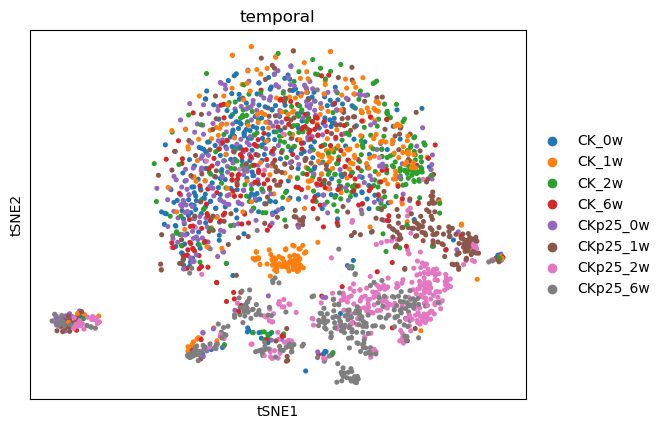

/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


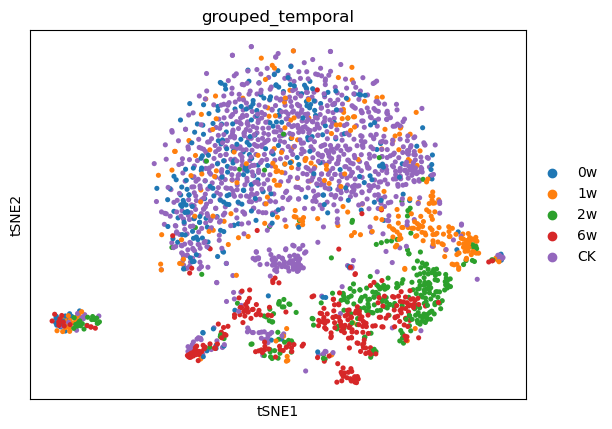

In [2]:
adata = sc.read('/mnt/home/cottre61/GFP-GAT/STAGATE_pyG/scRNAseq-TopAnalysis/Alzheimers_TopPert/Alzheimers_Data.h5ad')
sc.pl.tsne(adata, color='temporal')
sc.pl.tsne(adata, color='grouped_temporal')

Significant genes at 2 weeks of development

/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/mnt/ufs18/home-219/cottre61/GFP-GAT/STAGATE_pyG/scRNAseq-TopAnalysis/Alzheimers_TopPert/GeneCoexpressionNetworks.py:56: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata2.var['logfoldchanges'] = top_n_degs.set_index('names')['logfoldchanges']


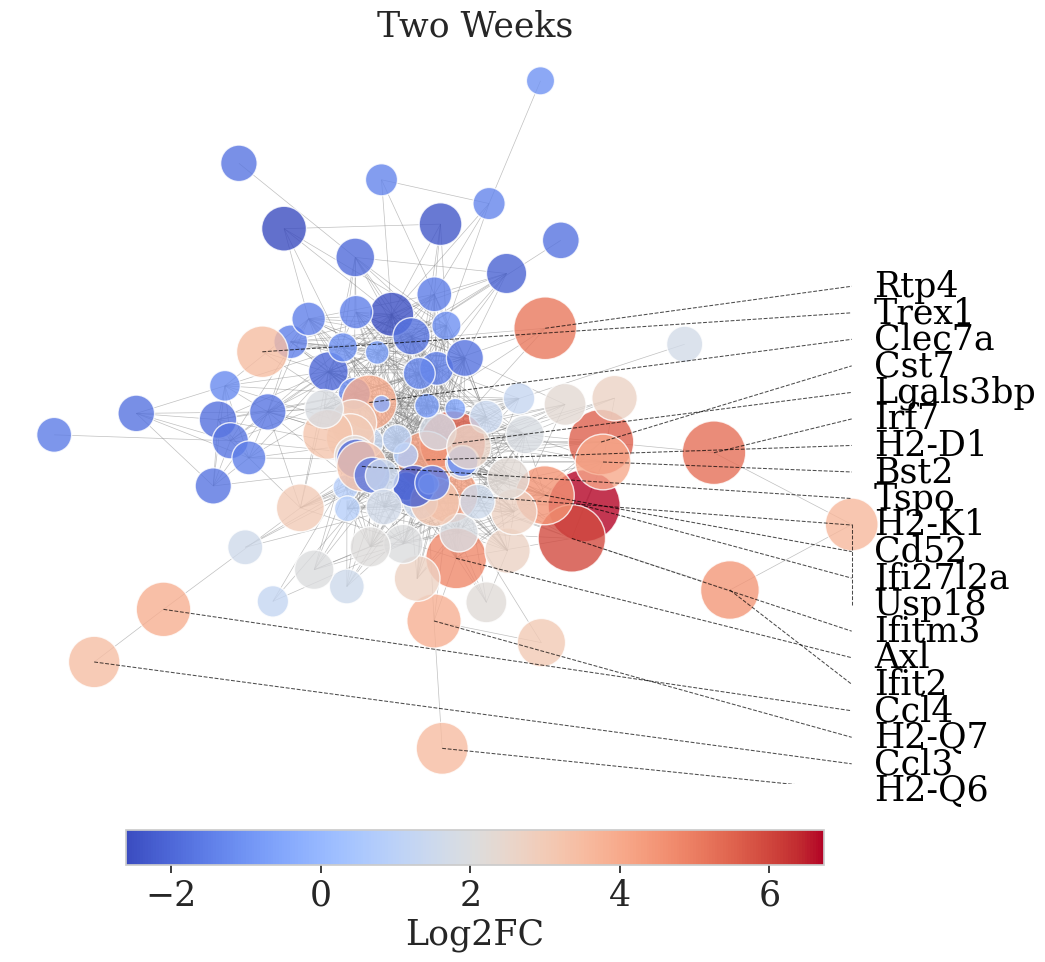

In [4]:
from GeneCoexpressionNetworks import GeneCoexpressionNetwork, plot_network
# construct gene coexpression network
adata3 = adata.copy()
threshold=0.4 
# note gcn expects preprocessed data (normalized / log transformed)
gcn = GeneCoexpressionNetwork(adata3, threshold, 100, '2w', 'grouped_temporal')
gene_names, G = gcn.GCN()
plot_network(G, stage='Two Weeks', n_labels=20)

Calculate topological significance of each differentially expressed gene and intersect scores across each scale

In [5]:
from SignificantGenes import SheafTopologicalSignificancesParallelComputation
from SignificantGenes import intersect_top_genes
# compute topological significances of each gene
radii = [0.4,0.45,0.5,0.55,0.6] 
radii = 1 / np.array(radii)
radii = radii[::-1]
args = [(G, gene, radii) for gene in gene_names]

# gene specific sheaf
scores = SheafTopologicalSignificancesParallelComputation(args)
genes = intersect_top_genes(scores, gene_names, 10)
print(genes)

Gene Specific Sheaf Laplacian Spectrum Analysis:   0%|          | 0/100 [00:00<?, ?Gene Specific Perturbations/s]

Gene Specific Sheaf Laplacian Spectrum Analysis: 100%|██████████| 100/100 [08:06<00:00,  4.87s/Gene Specific Perturbations]

num genes:  100
num scales:  5
['Lgals3bp', 'Ftl1', 'Gapdh', 'Gm17821', 'Glul', 'Psme1']


In [6]:
from SignificantGenes import LogFC_SheafTopologicalSignificancesParallelComputation
# Log FC Sheaf
scores2 = LogFC_SheafTopologicalSignificancesParallelComputation(args)
genes2 = intersect_top_genes(scores2, gene_names, 10)
print(genes2)

Log FC Sheaf Laplacian Spectrum Analysis:   5%|▌         | 5/100 [00:27<05:40,  3.59s/Gene Specific Perturbations]/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10004: ComplexWarning: Casting complex values to real discards the imaginary part
  values = np.asarray(values, dtype=float)
Log FC Sheaf Laplacian Spectrum Analysis:  22%|██▏       | 22/100 [02:02<09:55,  7.63s/Gene Specific Perturbations]/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10004: ComplexWarning: Casting complex values to real discards the imaginary part
  values = np.asarray(values, dtype=float)
Log FC Sheaf Laplacian Spectrum Analysis:  25%|██▌       | 25/100 [02:14<06:56,  5.55s/Gene Specific Perturbations]/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10004: ComplexWarning: Casting complex values to real discards the imaginary part
  values = np.asarray(values, dtype=float)
Lo

num genes:  100
num scales:  5
['Ctsb', 'Cx3cr1', 'Ifi27l2a', 'P2ry12', 'Axl', 'Malat1', 'Cst3', 'Ifitm3', 'Rtp4']


/mnt/ufs18/home-219/cottre61/GFP-GAT/STAGATE_pyG/scRNAseq-TopAnalysis/Alzheimers_TopPert/GeneCoexpressionNetworks.py:283: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genes', y='Score', data=scale_data, palette='tab20', ax=ax)
/mnt/ufs18/home-219/cottre61/GFP-GAT/STAGATE_pyG/scRNAseq-TopAnalysis/Alzheimers_TopPert/GeneCoexpressionNetworks.py:283: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genes', y='Score', data=scale_data, palette='tab20', ax=ax)
/mnt/ufs18/home-219/cottre61/GFP-GAT/STAGATE_pyG/scRNAseq-TopAnalysis/Alzheimers_TopPert/GeneCoexpressionNetworks.py:283: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

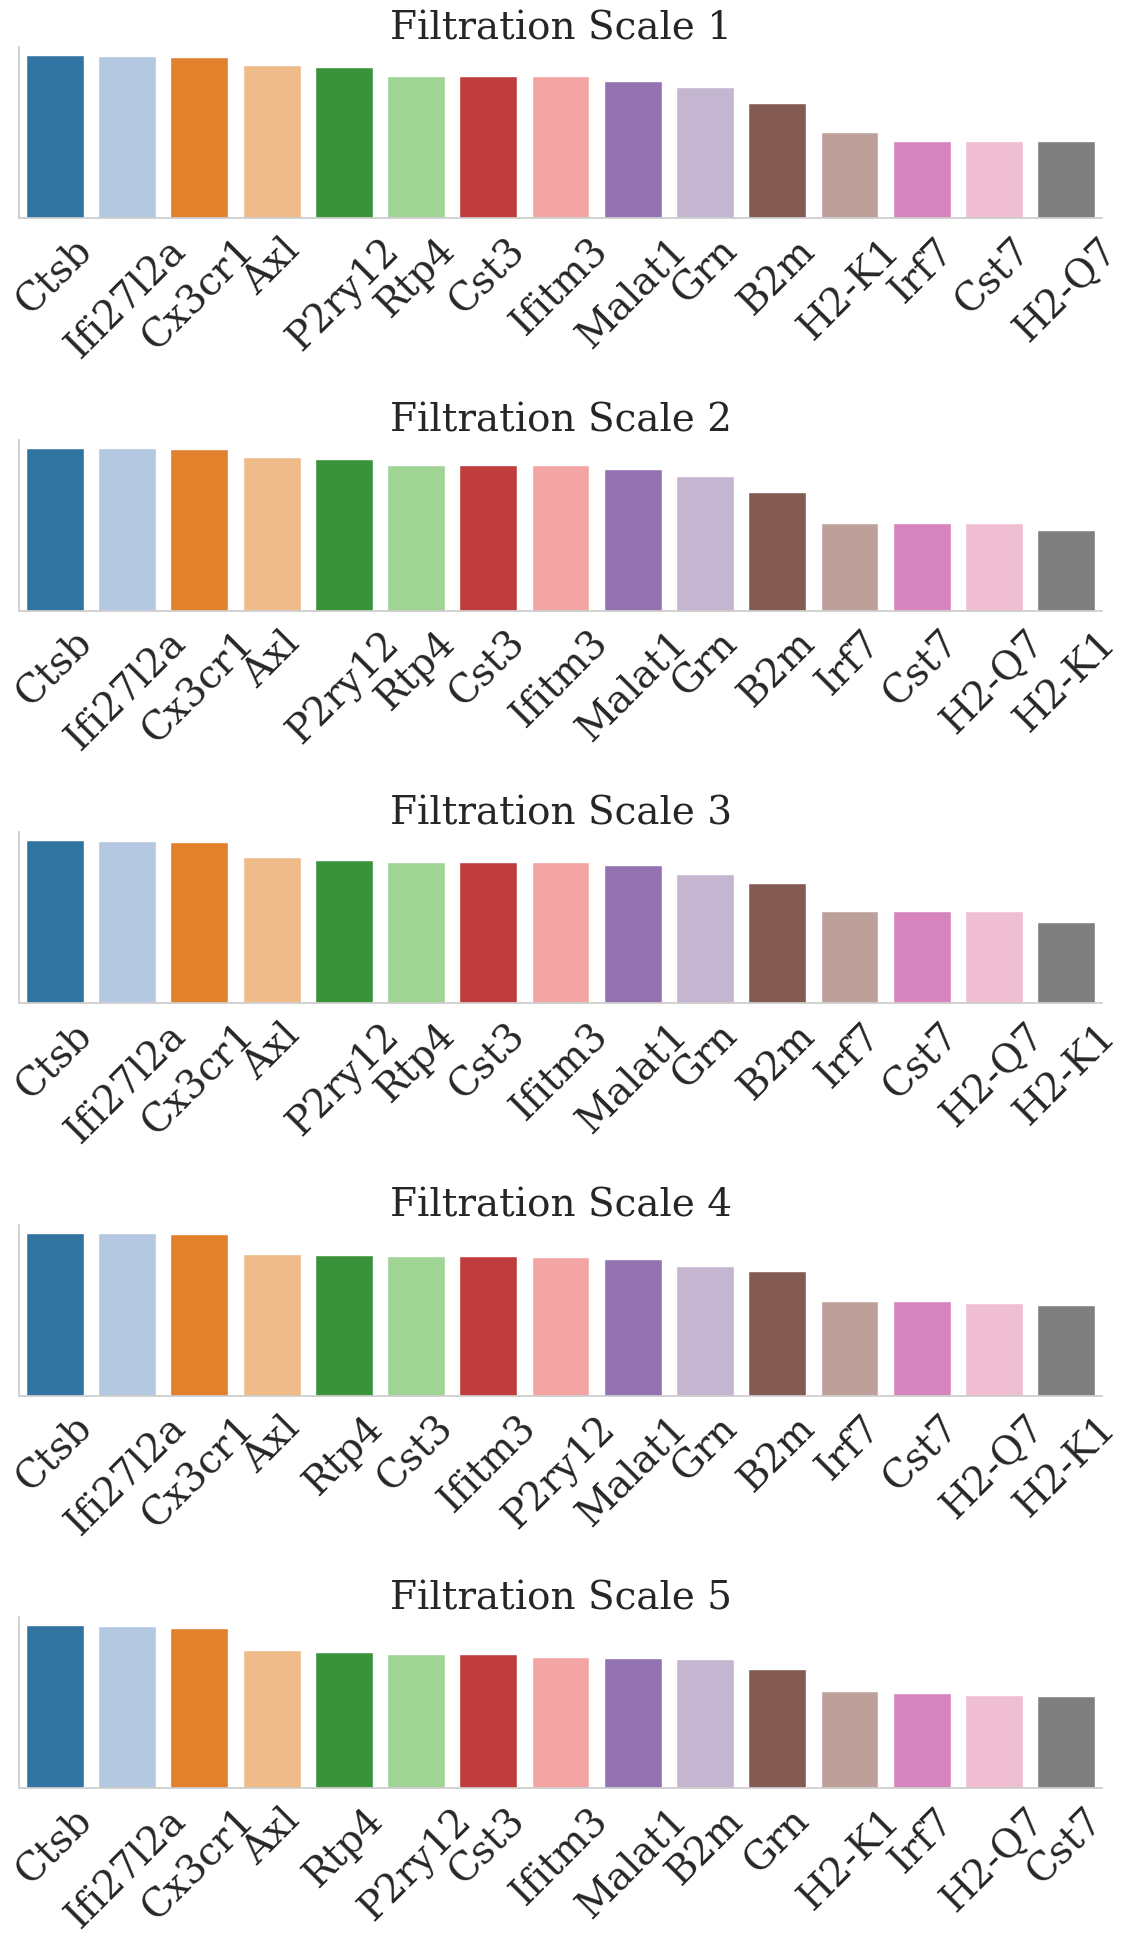

In [7]:
from GeneCoexpressionNetworks import plot_topological_scores
plot_topological_scores(scores2, gene_names)

Significant genes at 6 weeks of development

/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/mnt/ufs18/home-219/cottre61/GFP-GAT/STAGATE_pyG/scRNAseq-TopAnalysis/Alzheimers_TopPert/GeneCoexpressionNetworks.py:56: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata2.var['logfoldchanges'] = top_n_degs.set_index('names')['logfoldchanges']


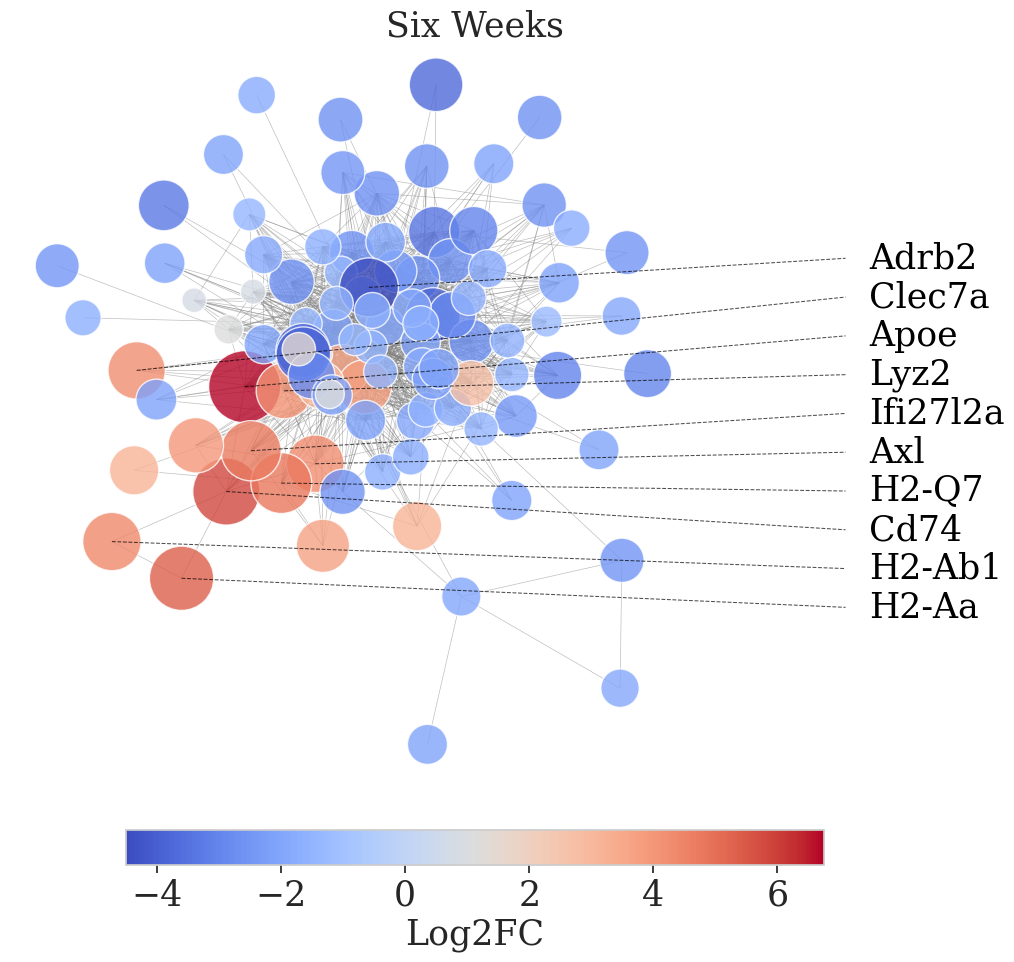

In [9]:
gcn2 = GeneCoexpressionNetwork(adata3, threshold, 100, '6w', 'grouped_temporal')
gene_names2, G2 = gcn2.GCN()
plot_network(G2, stage = 'Six Weeks', n_labels=10)

In [10]:
args2 = [(G2, gene, radii) for gene in gene_names2]
# gene specific sheaf
scores3 = SheafTopologicalSignificancesParallelComputation(args2)
genes3 = intersect_top_genes(scores3, gene_names2, 10)
print(genes3)

Gene Specific Sheaf Laplacian Spectrum Analysis:   0%|          | 0/100 [00:00<?, ?Gene Specific Perturbations/s]

Gene Specific Sheaf Laplacian Spectrum Analysis: 100%|██████████| 100/100 [30:28<00:00, 18.28s/Gene Specific Perturbations]


num genes:  100
num scales:  5
['Apoe', 'Cfh', 'Hspa5', 'Sft2d1', 'H2-Q6']


In [11]:
# Log FC Sheaf
scores4 = LogFC_SheafTopologicalSignificancesParallelComputation(args2)
genes4 = intersect_top_genes(scores4, gene_names2, 10)
print(genes4)

Log FC Sheaf Laplacian Spectrum Analysis:  20%|██        | 20/100 [06:14<22:36, 16.96s/Gene Specific Perturbations] /mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10004: ComplexWarning: Casting complex values to real discards the imaginary part
  values = np.asarray(values, dtype=float)
Log FC Sheaf Laplacian Spectrum Analysis:  92%|█████████▏| 92/100 [30:05<01:52, 14.12s/Gene Specific Perturbations]/mnt/home/cottre61/anaconda3/envs/GATE/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10004: ComplexWarning: Casting complex values to real discards the imaginary part
  values = np.asarray(values, dtype=float)
Log FC Sheaf Laplacian Spectrum Analysis: 100%|██████████| 100/100 [32:03<00:00, 19.23s/Gene Specific Perturbations]


num genes:  100
num scales:  5
['Apoe', 'P2ry12', 'Sparc', 'Tmem119', 'Selplg', 'Olfml3', 'Csf1r', 'Cst3', 'Cd164']


/mnt/ufs18/home-219/cottre61/GFP-GAT/STAGATE_pyG/scRNAseq-TopAnalysis/Alzheimers_TopPert/GeneCoexpressionNetworks.py:283: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genes', y='Score', data=scale_data, palette='tab20', ax=ax)
/mnt/ufs18/home-219/cottre61/GFP-GAT/STAGATE_pyG/scRNAseq-TopAnalysis/Alzheimers_TopPert/GeneCoexpressionNetworks.py:283: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genes', y='Score', data=scale_data, palette='tab20', ax=ax)
/mnt/ufs18/home-219/cottre61/GFP-GAT/STAGATE_pyG/scRNAseq-TopAnalysis/Alzheimers_TopPert/GeneCoexpressionNetworks.py:283: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

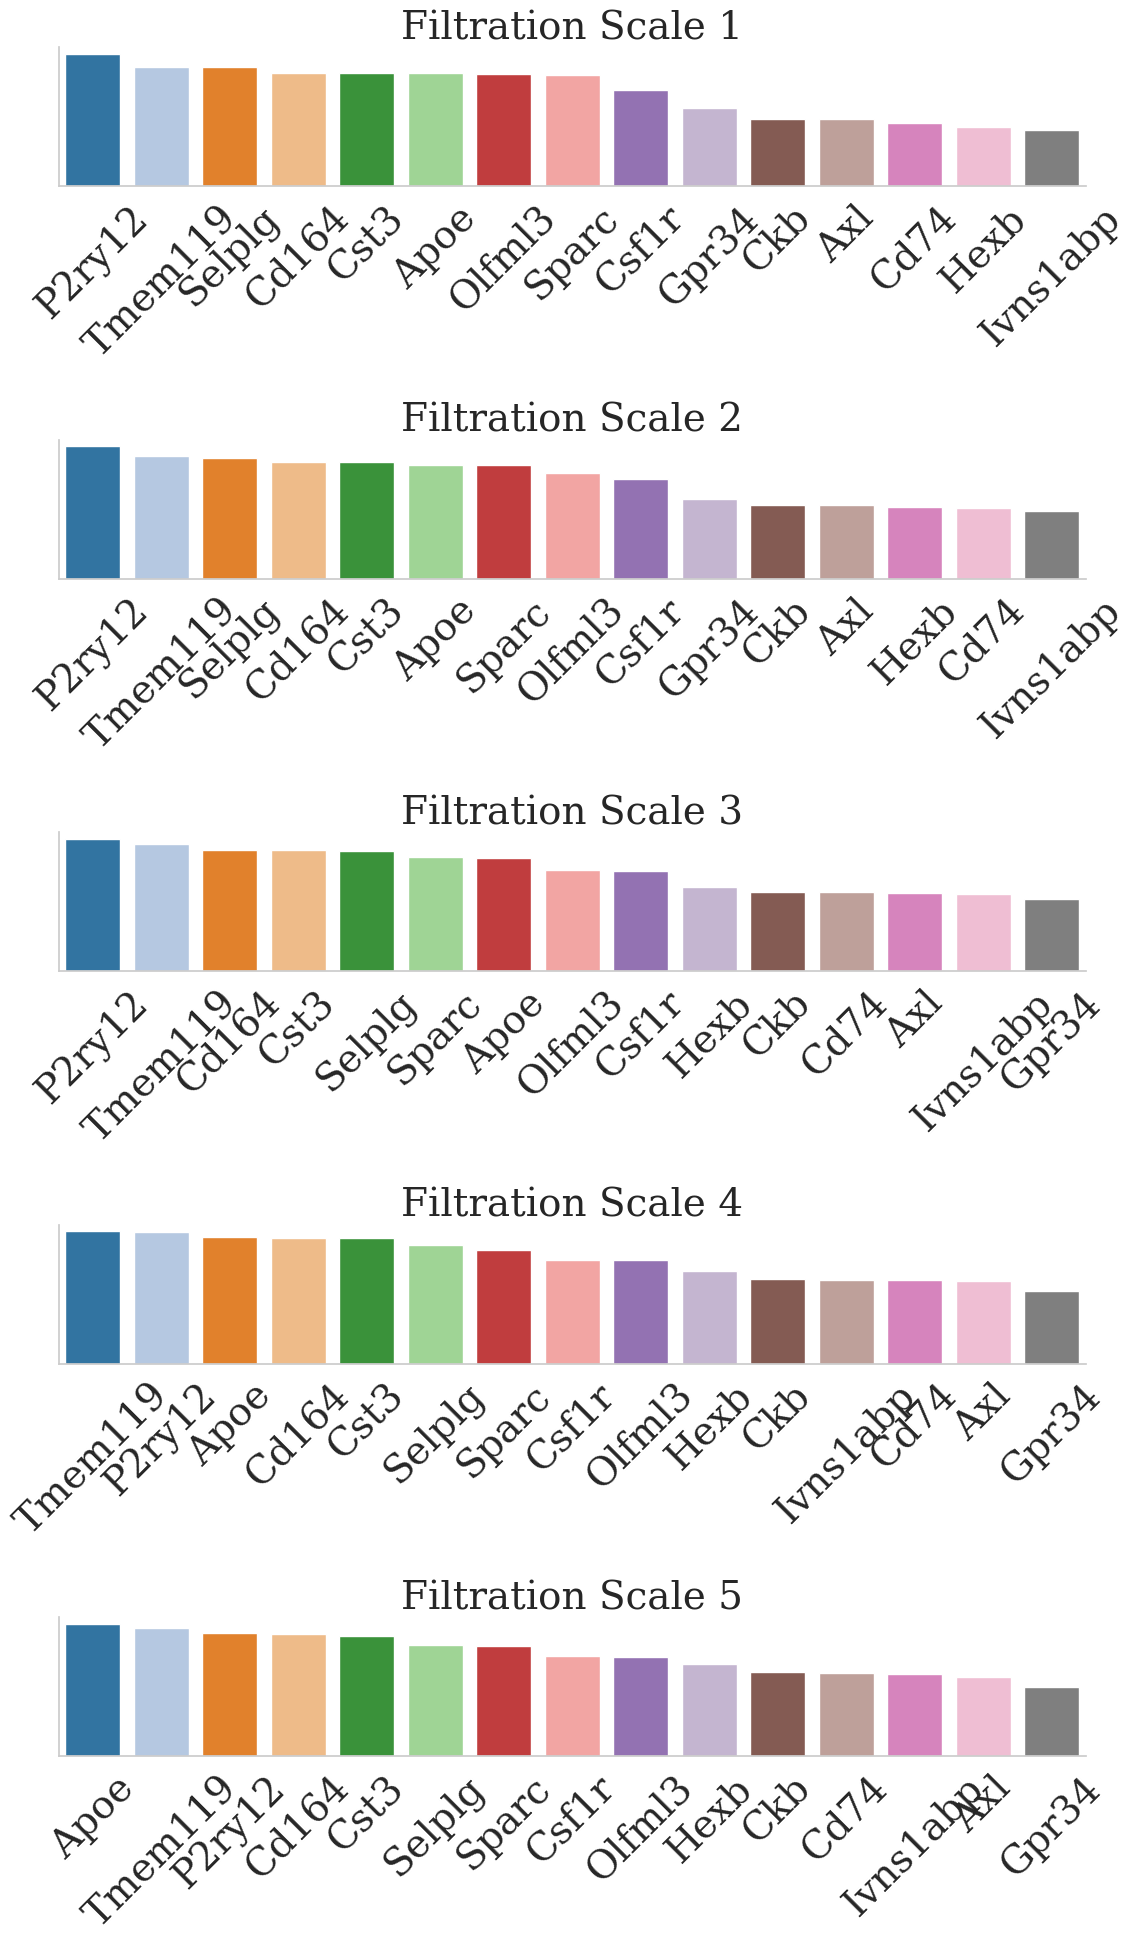

In [12]:
plot_topological_scores(scores4, gene_names2)

Combine gene specific sheaf and logFC sheaf resutls for pathway enrichment analysis

In [13]:
genes_early = genes + genes2 
genes_late = genes3 + genes4

Pathway Enrichment Analysis of the significant genes

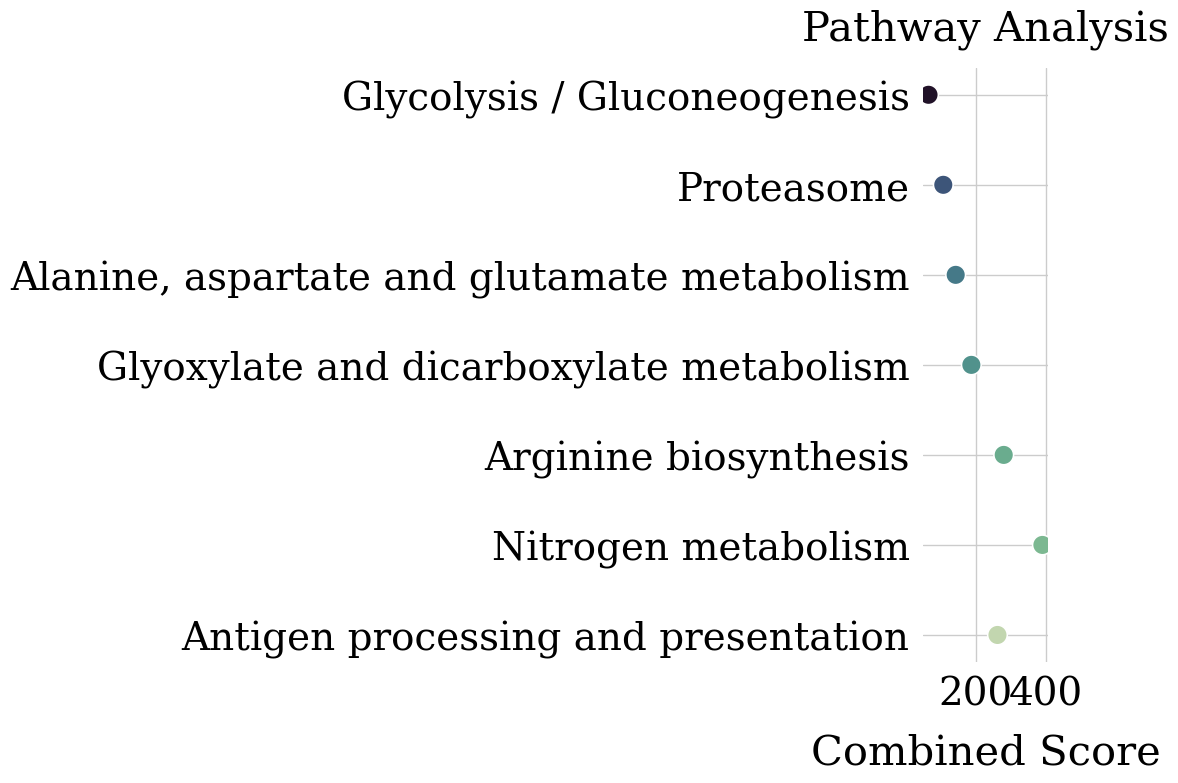

In [14]:
import gseapy as gp
enr=gp.enrichr(gene_list=genes_early,  
               gene_sets=['KEGG_2021_Human'], 
               organism='human', 
               outdir=None,
               cutoff=0.05)

results = enr.results
significant_pathways = results[results['P-value'] < 0.05]

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.figure(figsize=(11, 8)) 
plt.subplots_adjust(left=0.4, right=0.95)  # Decrease left padding and keep right tight
plt.tight_layout() 

custom_cmap = sns.cubehelix_palette(as_cmap=True, start=0.5, rot=-0.75, dark=0.1, light=0.8)

sns.scatterplot(
    x='Combined Score', 
    y='Term', 
    data=significant_pathways,
    hue='P-value',
    palette=custom_cmap,
    s=200,  
    edgecolor='white',
    legend=None
)

plt.title('Pathway Analysis', fontsize=30, pad=20, color='black')
#plt.legend(fontsize=30)
plt.xlabel('Combined Score', fontsize=30, labelpad=15, color='black')
plt.ylabel('', fontsize=30, labelpad=15, color='black')
plt.tick_params(axis='x', which='major', labelsize=28, colors='black')
plt.tick_params(axis='y', which='major', labelsize=28, colors='black')
plt.gca().invert_yaxis()
sns.despine(left=True, bottom=True)
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.show()

In [15]:
import plotly.graph_objects as go
import plotly.colors as pcolors

top_n = significant_pathways.nlargest(8, 'Combined Score')
pathways = top_n['Term'].tolist()
all_genes = set()
links_data = []

for i, row in top_n.iterrows():
    term = row['Term']
    genes = row['Genes'].split(';')
    for g in genes:
        all_genes.add(g)
        links_data.append((term, g))

nodes = pathways + list(all_genes)
node_indices = {name: i for i, name in enumerate(nodes)}

links = dict(
    source=[node_indices[source] for (source, target) in links_data],
    target=[node_indices[target] for (source, target) in links_data],
    value=[1]*len(links_data)
)

color_palette = pcolors.qualitative.Plotly
node_colors = (color_palette * (len(nodes)//len(color_palette) + 1))[:len(nodes)]

fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color=node_colors
    ),
    link=links
)])

fig.update_layout(
    title_text=" ",
    font=dict(family="DejaVu Serif", size=30, color="black"),
    width=600,  
    height=600
)
fig.show()


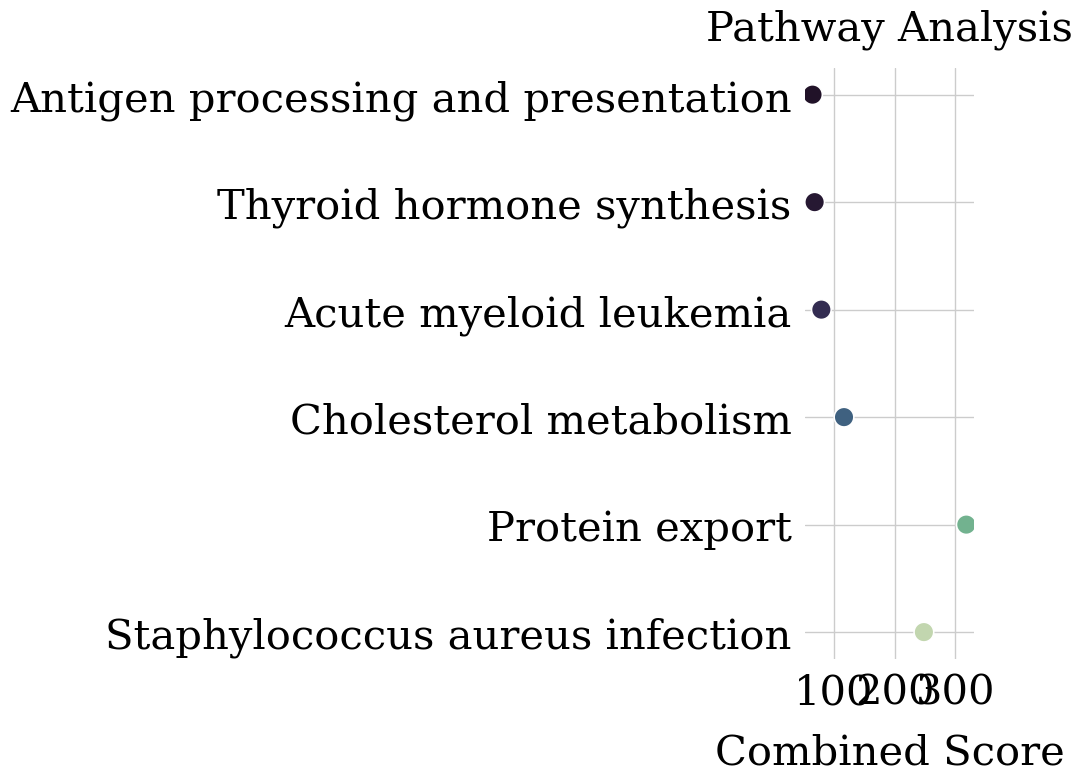

In [16]:
import gseapy as gp
enr=gp.enrichr(gene_list=genes_late,  
               gene_sets=['KEGG_2021_Human'], 
               organism='human', 
               outdir=None,
               cutoff=0.05)

results = enr.results
significant_pathways = results[results['P-value'] < 0.05]

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.figure(figsize=(10, 8)) 
plt.subplots_adjust(left=0.4, right=0.95) 
plt.tight_layout() 

custom_cmap = sns.cubehelix_palette(as_cmap=True, start=0.5, rot=-0.75, dark=0.1, light=0.8)

sns.scatterplot(
    x='Combined Score', 
    y='Term', 
    data=significant_pathways,
    hue='P-value',
    palette=custom_cmap,
    s=200,  
    edgecolor='white',
    legend=None
)

plt.title('Pathway Analysis', fontsize=30, pad=20, color='black')
#plt.legend(fontsize=30)
plt.xlabel('Combined Score', fontsize=30, labelpad=15, color='black')
plt.ylabel('', fontsize=28, labelpad=15, color='black')
plt.tick_params(axis='x', which='major', labelsize=30, colors='black')
plt.tick_params(axis='y', which='major', labelsize=30, colors='black')
plt.gca().invert_yaxis()
sns.despine(left=True, bottom=True)
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.show()


In [17]:
import plotly.graph_objects as go
import plotly.colors as pcolors

top_n = significant_pathways.nlargest(8, 'Combined Score')

pathways = top_n['Term'].tolist()
all_genes = set()
links_data = []

for i, row in top_n.iterrows():
    term = row['Term']
    genes = row['Genes'].split(';')
    for g in genes:
        all_genes.add(g)
        links_data.append((term, g))

nodes = pathways + list(all_genes)
node_indices = {name: i for i, name in enumerate(nodes)}

links = dict(
    source=[node_indices[source] for (source, target) in links_data],
    target=[node_indices[target] for (source, target) in links_data],
    value=[1]*len(links_data)
)

color_palette = pcolors.qualitative.Plotly
node_colors = (color_palette * (len(nodes)//len(color_palette) + 1))[:len(nodes)]

fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color=node_colors
    ),
    link=links
)])

fig.update_layout(
    title_text=" ",
    font=dict(family="DejaVu Serif", size=30, color="black"),
    width=600,  # narrower figure width
    height=600
)
fig.show()


Two Weeks:

['Lgals3bp', 'Ftl1', 'Gapdh', 'Gm17821', 'Glul', 'Psme1', 'Ctsb', 'Cx3cr1', 'Ifi27l2a', 'P2ry12', 'Axl', 'Malat1', 'Cst3', 'Ifitm3', 'Rtp4']

Six Weeks: 

['Apoe', 'Cfh', 'Hspa5', 'Sft2d1', 'H2-Q6', 'P2ry12', 'Sparc', 'Tmem119', 'Selplg', 'Olfml3', 'Csf1r', 'Cst3', 'Cd164']